2. (\*) Напишите функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график ее зависимости от количества кластеров `k` (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [2]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import warnings
warnings.filterwarnings('ignore')

In [3]:
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

In [4]:
X, y = make_blobs(n_samples=100, random_state=1)

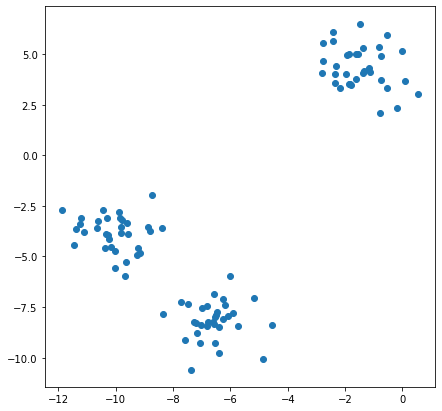

In [5]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1]);

In [6]:
def kmeans(data, k, max_iterations=10, min_distance=1e-4):
       
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for i in range(max_iterations):
        # Создадим словарь для классификации
        classes = {i: [] for i in range(k)}
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
              
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        
        for ind in range(len(centroids)):
            distance = e_metrics(centroids[ind], old_centroids[ind])
            if distance > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            print('stop:', i)
            break
    
    return old_centroids, classes

In [7]:
def rms_intracluster_distance(centroids, clusters):
    res = 0.0
    for k in range(len(centroids)):
        intracluster_distance = 0.0
        for x in clusters[k]:
            intracluster_distance += pow(e_metrics(x, centroids[k]), 2)
        intracluster_distance /= len(clusters[k])
        res += intracluster_distance
    return res

In [8]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'purple', 'darkred', 'olive', 'navy']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item], alpha=0.7)
            
    plt.show()

stop: 1


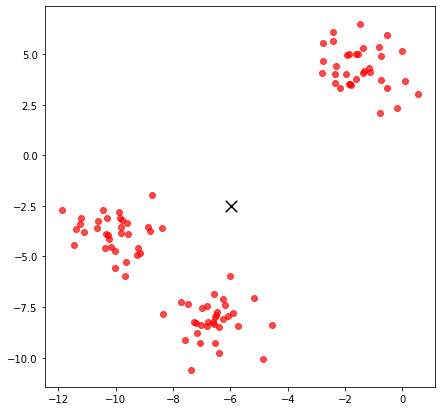

stop: 1


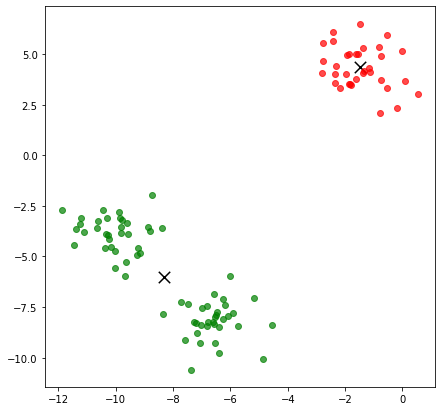

stop: 3


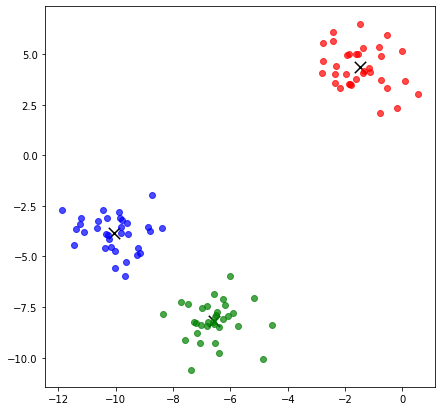

stop: 3


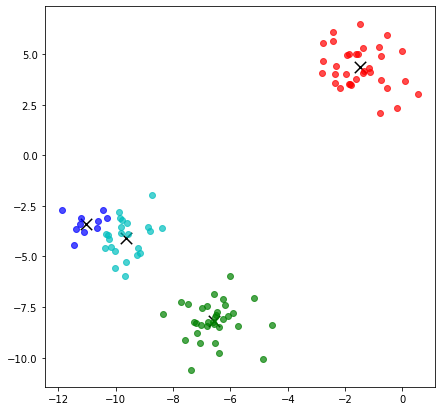

stop: 3


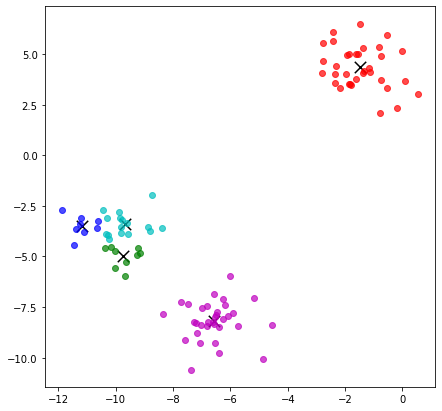

stop: 3


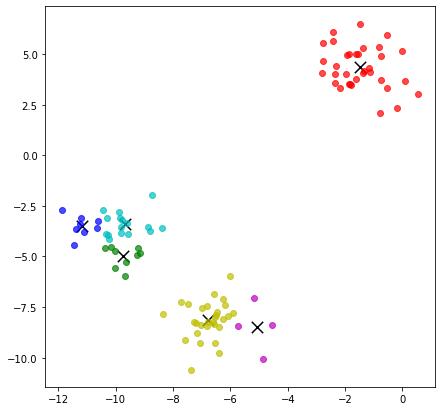

stop: 3


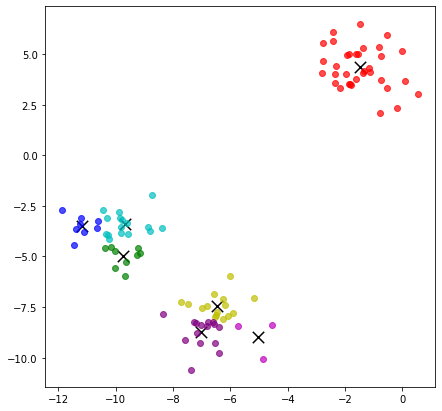

stop: 4


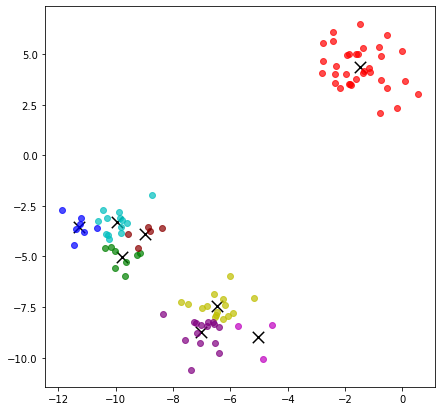

stop: 4


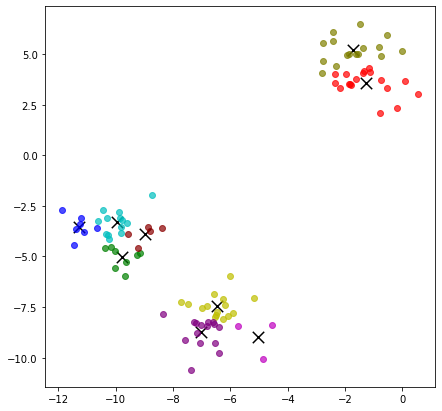

stop: 7


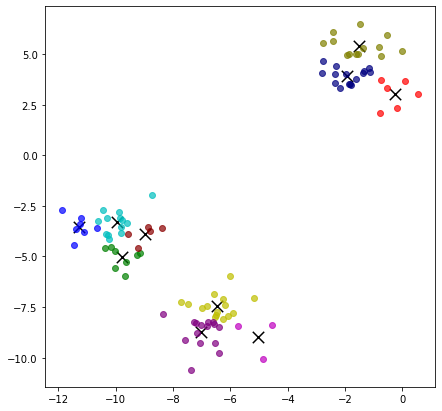

In [9]:
rms = []
k = range(1, 11)
for i in range(1, 11):
    centroids, clusters = kmeans(X, i)
    visualize(centroids, clusters)
    rms.append(rms_intracluster_distance(centroids, clusters))

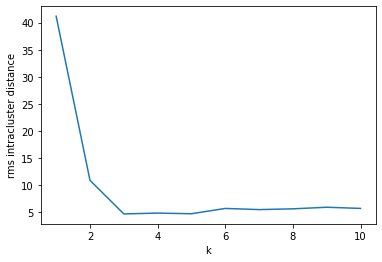

In [10]:
plt.xlabel('k')
plt.ylabel('rms intracluster distance')
plt.plot(k, rms)
plt.show()

**Выводы:** как и следовало ожидать, оптимальным количеством кластеров для данного датасета является 3 - при нём достигается минимальное значение среднего квадратичного внутрикластерного расстояния.